In [1]:
from SEIR_PRASS_V3 import *
import pandas as pd
BBDD_Dir='/home/santiago/Documentos/Desarrollo/Covid19/BBDD/'
Indice_Movilidad= pd.read_excel(str(BBDD_Dir)+'/A.xlsx')
A_vect=Indice_Movilidad['Movilidad'][:]

<h1 style="color:red"> Escenario 0: No PRASS, relajando condiciones a partir de Sept 1</h1>

### 1. A=0.4

In [2]:
E0_NOPRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<183:
        At=A1
    if 183<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E0_NOPRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E0_NOPRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E0_NOPRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E0_NOPRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3                     
)

#PRASS
E0_NOPRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    return 0.
#phi
def phi(t):
    return 0.


E0_NOPRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E0_NOPRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)


### SIMULACIÓN

In [3]:
T_total=700
T_ini=42
E0_NOPRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E0_NOPRASS.Contar_Tests()
E0_NOPRASS.Contar_PRASS()
E0_NOPRASS.Contar_UCI()

<h1 style='color:red'> Escenario 1: PRASS Actual, 2000 rastreos. Grupo Familiar Nuclear phi=1/6.5  </h1>


In [4]:
E1_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<183:
        At=A1
    if 183<=t:
        At=A2
    return (1-At)*beta_0 + At*beta_1

E1_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E1_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E1_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E1_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E1_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=1.,
n_CSS=2.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=2000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 1.0/6.5

E1_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E1_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [5]:
T_total=700
T_ini=42
E1_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E1_PRASS.Contar_Tests()
E1_PRASS.Contar_PRASS()
E1_PRASS.Contar_UCI()
E1_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 2: PRASS Doble, 5000 rastreos. Grupo Familiar Nuclear phi=1/6.5  </h1>


In [6]:
E2_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<183:
        At=A1
    if 183<=t:
        At=A2
    return (1-At)*beta_0 + At*beta_1

E2_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E2_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E2_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E2_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E2_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=1.,
n_CSS=2.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=5000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 1.0/6.5

E2_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E2_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [7]:
T_total=700
T_ini=42
E2_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E2_PRASS.Contar_Tests()
E2_PRASS.Contar_PRASS()
E2_PRASS.Contar_UCI()
E2_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 3: PRASS Doble, 5000 rastreos. Grupo Familiar Extendido phi=3/6.5  </h1>


In [8]:
E3_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<183:
        At=A1
    if 183<=t:
        At=A2
    return (1-At)*beta_0 + At*beta_1

E3_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E3_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E3_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E3_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E3_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=7.,
n_CSS=5.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=5000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 3.0/6.5

E3_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E3_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [9]:
T_total=700
T_ini=42
E3_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E3_PRASS.Contar_Tests()
E3_PRASS.Contar_PRASS()
E3_PRASS.Contar_UCI()
E3_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 4: PRASS Doble, 5000 rastreos. Grupo Externo phi=4.5/6.5  </h1>


In [10]:
E4_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<183:
        At=A1
    if 183<=t:
        At=A2
    return (1-At)*beta_0 + At*beta_1

E4_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E4_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E4_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E4_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E4_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=21.5,
n_CSS=5.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=5000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 4.5/6.5

E4_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E4_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [11]:
T_total=700
T_ini=42
E4_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E4_PRASS.Contar_Tests()
E4_PRASS.Contar_PRASS()
E4_PRASS.Contar_UCI()
E4_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Comparación </h1>

/home/santiago/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


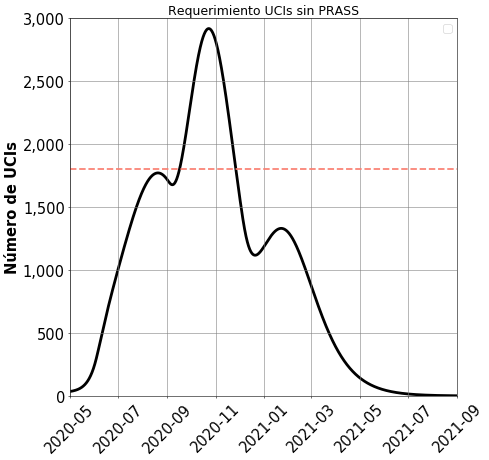

In [12]:
plot_varios([E0_NOPRASS.t_],
           [E0_NOPRASS.Requieren_UCI],
           u'Dias',u'Número de UCIs',[''],nombre='Requerimiento UCIs sin PRASS',
           style=['-','-','--'],colors=['black'],
           hline=True, hvalues=[1800],x_min='01/05/2020',x_max='01/09/2021',)

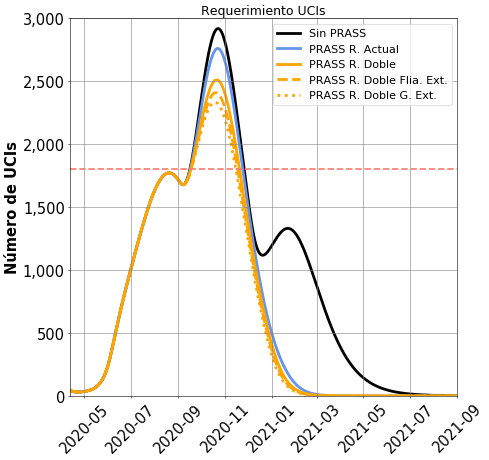

In [13]:
plot_varios([E0_NOPRASS.t_,E1_PRASS.t_,E2_PRASS.t_,E3_PRASS.t_,E4_PRASS.t_],
           [E0_NOPRASS.Requieren_UCI,E1_PRASS.Requieren_UCI,E2_PRASS.Requieren_UCI,E3_PRASS.Requieren_UCI,E4_PRASS.Requieren_UCI],
           u'Dias',u'Número de UCIs',
           labels=['Sin PRASS','PRASS R. Actual','PRASS R. Doble','PRASS R. Doble Flia. Ext.','PRASS R. Doble G. Ext.'],
           nombre='Requerimiento UCIs',
           style=['-','-','-','--',':'],colors=['black','cornflowerblue', 'orange' ,'orange','orange'],
           hline=True, hvalues=[1800],
           x_min='12/04/2020',x_max='01/09/2021')

<h1 style='color:red'> Escenario 5: PRASS 12000 rastreos. Grupo Familiar phi=1/6.5  </h1>

In [14]:
E5_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<184:
        At=A1
    if 184<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E5_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E5_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E5_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E5_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E5_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=1.,
n_CSS=2.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=12000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 1/6.5

E5_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E5_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [15]:
T_total=700
T_ini=42
E5_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E5_PRASS.Contar_Tests()
E5_PRASS.Contar_PRASS()
E5_PRASS.Contar_UCI()
E5_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 6: PRASS 12000 rastreos. Grupo Familiar Extendido phi=3/6.5  </h1>


In [16]:
E6_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<184:
        At=A1
    if 184<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E6_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)


#Tiempos de estadía
E6_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E6_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E6_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E6_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=7.,
n_CSS=5.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=12000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 3./6.5

E6_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E6_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [17]:
T_total=700
T_ini=42
E6_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E6_PRASS.Contar_Tests()
E6_PRASS.Contar_PRASS()
E6_PRASS.Contar_UCI()
E6_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 7: PRASS 12000 rastreos. Grupo Externo phi=4.5/6.5  </h1>


In [18]:
E7_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<184:
        At=A1
    if 184<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E7_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E7_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E7_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E7_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E7_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=21.5,
n_CSS=5.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=12000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    else:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    else:
        return 4.5/6.5


E7_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E7_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [19]:
T_total=700
T_ini=42
E7_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E7_PRASS.Contar_Tests()
E7_PRASS.Contar_PRASS()
E7_PRASS.Contar_UCI()
E7_PRASS.Calcular_Proporciones()

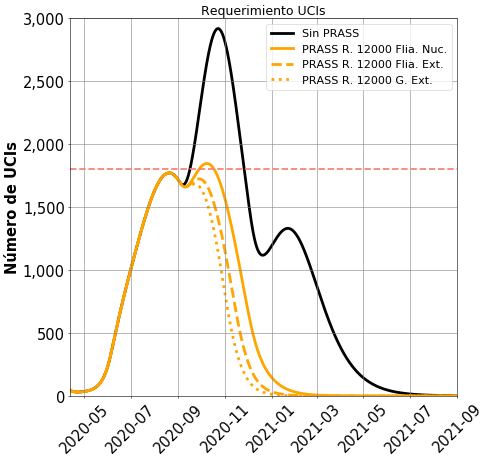

In [20]:
plot_varios([E0_NOPRASS.t_,E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
           [E0_NOPRASS.Requieren_UCI,E5_PRASS.Requieren_UCI,E6_PRASS.Requieren_UCI,E7_PRASS.Requieren_UCI],
           u'Dias',u'Número de UCIs',
           labels=['Sin PRASS','PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
           nombre='Requerimiento UCIs',
           style=['-','-','--',':'],colors=['black','orange' ,'orange','orange'],
           hline=True, hvalues=[1800],
           x_min='12/04/2020',x_max='01/09/2021')

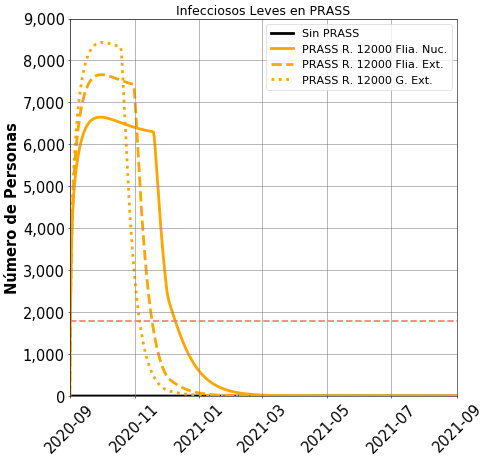

In [21]:
plot_varios([E0_NOPRASS.t_,E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
           [E0_NOPRASS.IMP_vect,E5_PRASS.IMP_vect,E6_PRASS.IMP_vect,E7_PRASS.IMP_vect],
           u'Dias',u'Número de Personas',
           labels=['Sin PRASS','PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
           nombre='Infecciosos Leves en PRASS',
           style=['-','-','--',':'],colors=['black','orange' ,'orange','orange'],
           hline=True, hvalues=[1800],
           x_min='01/09/2020',x_max='01/09/2021')

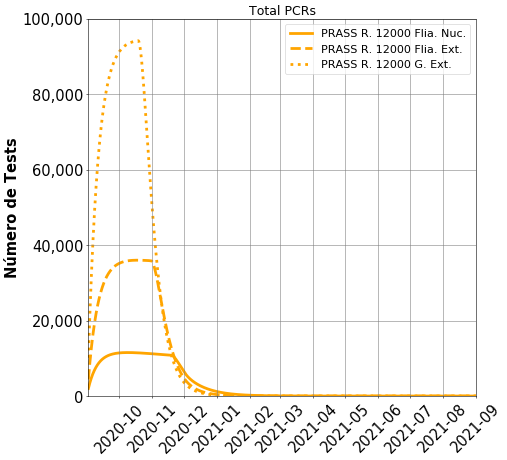

In [22]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.PCR_Total,E6_PRASS.PCR_Total,E7_PRASS.PCR_Total],
            eje_x=u'Dias',eje_y=u'Número de Tests',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Total PCRs',
            style=['-','--',':'],colors=['orange','orange','orange'],
            x_min='02/09/2020',x_max='01/09/2021')

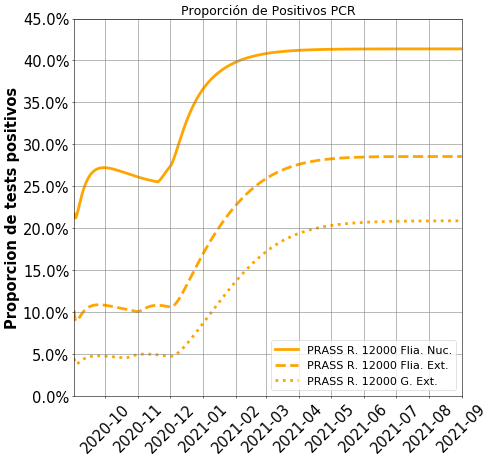

In [23]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.R_pos_PCR,E6_PRASS.R_pos_PCR,E7_PRASS.R_pos_PCR],
            eje_x=u'Dias',eje_y=u'Proporcion de tests positivos',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre=u'Proporción de Positivos PCR',
            style=['-','--',':'],colors=['orange','orange','orange'],
            x_min='02/09/2020',x_max='01/09/2021',
            decimales=True, porcentaje=True)

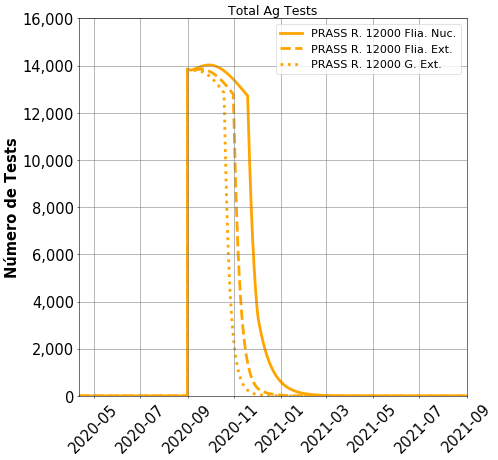

In [24]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.AG,E6_PRASS.AG,E7_PRASS.AG],
            eje_x=u'Dias',eje_y=u'Número de Tests',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Total Ag Tests',
            style=['-','--',':'],colors=['orange','orange','orange'],
           x_min='12/04/2020',x_max='01/09/2021')

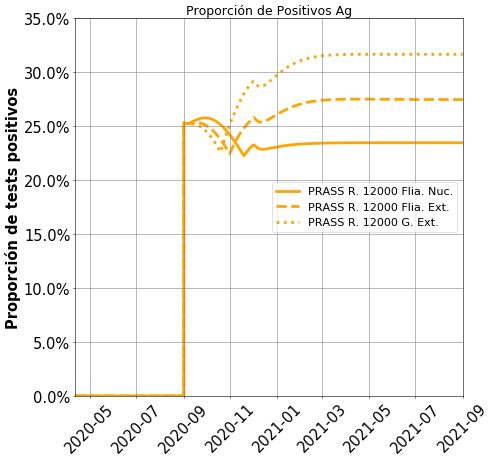

In [25]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.R_pos_AG,E6_PRASS.R_pos_AG,E7_PRASS.R_pos_AG],
            eje_x=u'Dias',eje_y=u'Proporción de tests positivos',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre=u'Proporción de Positivos Ag',
            style=['-','--',':'],colors=['orange','orange','orange'],
            x_min='12/04/2020',x_max='01/09/2021',
            decimales=True, porcentaje=True)

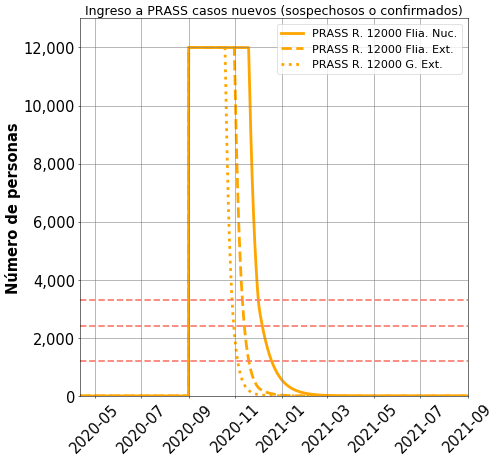

In [38]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.PRASS_nuevos_indices,E6_PRASS.PRASS_nuevos_indices,E7_PRASS.PRASS_nuevos_indices],
            eje_x=u'Dias',eje_y=u'Número de personas',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Ingreso a PRASS casos nuevos (sospechosos o confirmados)',
            style=['-','--',':'],colors=['orange','orange','orange'],
            hline=True,hvalues=[1200, 2400,3300],
            x_min='12/04/2020',x_max='01/09/2021', y_max=13000)

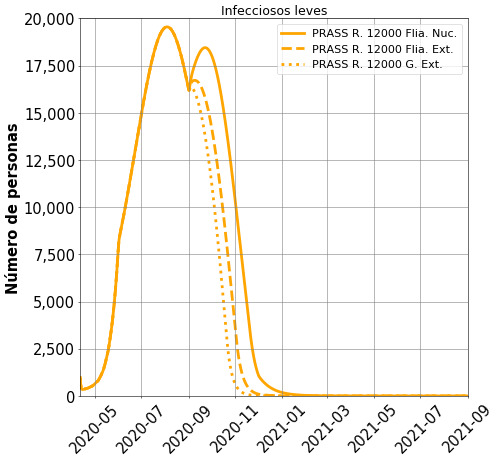

In [27]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.IM_vect,E6_PRASS.IM_vect,E7_PRASS.IM_vect],
            eje_x=u'Dias',eje_y=u'Número de personas',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Infecciosos leves',
            style=['-','--',':'],colors=['orange','orange','orange'],
            x_min='12/04/2020',x_max='01/09/2021')

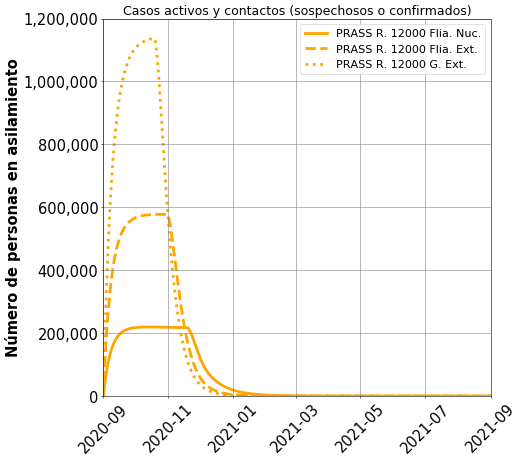

In [28]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.PRASS_aislamientos_diarios,E6_PRASS.PRASS_aislamientos_diarios,E7_PRASS.PRASS_aislamientos_diarios],
            eje_x=u'Dias',eje_y=u'Número de personas en asilamiento',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Casos activos y contactos (sospechosos o confirmados)',
            style=['-','--',':'],colors=['orange','orange','orange'],
            x_min='01/09/2020',x_max='01/09/2021')

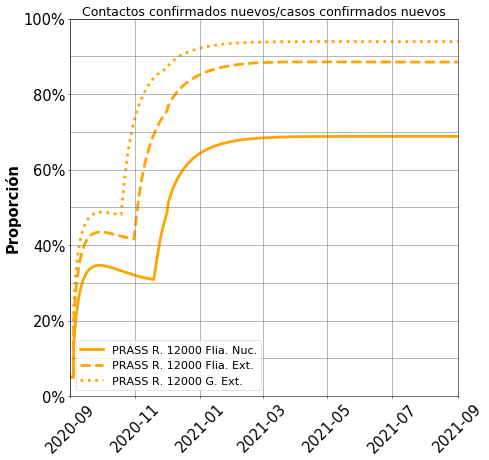

In [29]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.contconf_conf,E6_PRASS.contconf_conf,E7_PRASS.contconf_conf],
            eje_x=u'Dias',eje_y=u'Proporción',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Contactos confirmados nuevos/casos confirmados nuevos',
            style=['-','--',':'],colors=['orange','orange','orange'],
            decimales=True, porcentaje=True, 
            x_min='01/09/2020',x_max='01/09/2021')

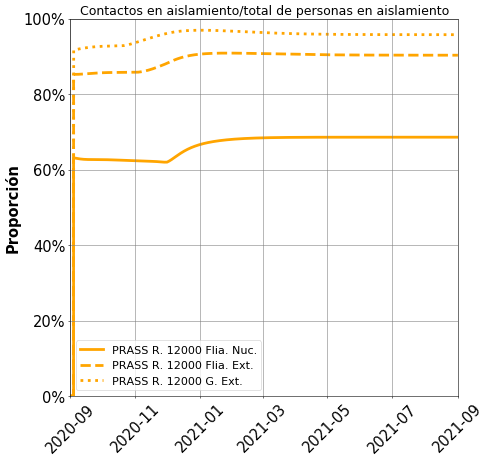

In [30]:
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [E5_PRASS.contais_ais,E6_PRASS.contais_ais,E7_PRASS.contais_ais],
            eje_x=u'Dias',eje_y=u'Proporción',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Contactos en aislamiento/total de personas en aislamiento',
            style=['-','--',':'],colors=['orange','orange','orange'],
            decimales=True, porcentaje=True,
            x_min='01/09/2020',x_max='01/09/2021')

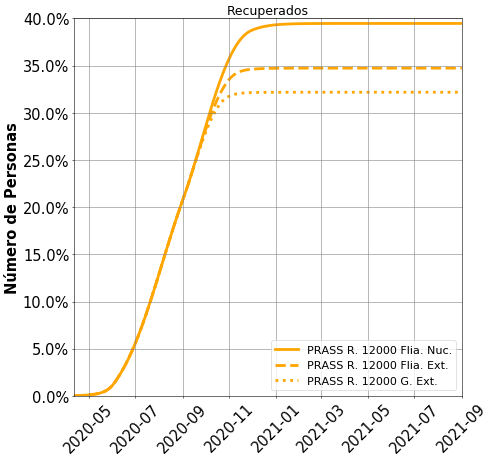

In [31]:
N0= 7592871.0
plot_varios([E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_],
            [np.array(E5_PRASS.R_vect)/N0,np.array(E6_PRASS.R_vect)/N0,np.array(E7_PRASS.R_vect)/N0],
            eje_x=u'Dias',eje_y=u'Número de Personas',
            labels=['PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.'],
            nombre='Recuperados',
            style=['-','--',':'],colors=['orange','orange','orange'],
            decimales=True, porcentaje=True,
            x_min='12/04/2020',x_max='01/09/2021')

<h1 style='color:red'> Escenario 8: PRASS 12000 rastreos, grupo Fam. Nuc. Sin Prass desde dic-1 </h1>

In [32]:
E8_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<184:
        At=A1
    if 184<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E8_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E8_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E8_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E8_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E8_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=1.,
n_CSS=2.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=12000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    elif t<365:
        if (alpha*IM)<(N/psi_T):
            return 1
        else:
            return (N/psi_T)/(alpha*IM)
    else:
        return 0

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    elif t<365:
        return 1./6.5
    else:
        return 0.

E8_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E8_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [33]:
T_total=700
T_ini=42
E8_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E8_PRASS.Contar_Tests()
E8_PRASS.Contar_PRASS()
E8_PRASS.Contar_UCI()
E8_PRASS.Calcular_Proporciones()

<h1 style='color:red'> Escenario 9: PRASS 12000 rastreos, grupo Fam. Ext. Sin Prass desde dic-1 </h1>

In [34]:
E9_PRASS=SEIR_PRASS()
#Trasmisión
def beta(t,A):
    A1=0.615
    A2=0.48
    A3=0.2
    beta_0=1.3743 #R0=3.0 ó beta_0=1.144998, #R0=2.5
    beta_1=0.019899665
    if t<92:
        At=A[int(t)]
    if 92<=t<184:
        At=A1
    if 184<=t<275:
        At=A2
    if 275<=t:
        At=A3
    return (1-At)*beta_0 + At*beta_1

E9_PRASS.set_trans(
beta,
beta_0=1.3743, #R0=3.0
#beta_0=1.144998, #R0=2.5
beta_1=0.019899665, 
beta_H=0.01, #Contacto  HR, UR, HD, UD, R
r=0.65,
Movilidad= A_vect
)

#Tiempos de estadía
E9_PRASS.var_t_estadia(
omega=1/4.6,      #T. prom. latencia
gamma_M=1/1.1,   #T. prom IM
sigma_C=1/3.,    #T. días en IC antes de aislamiento
sigma_CA=1/4.1,  #T. días en aislamiento ICA
sigma_CP=1/7.1,  #T. PRASS antes de hospitalización                           
gamma_HR=1/9.5,  #T. prom HR->R
nu=1/11.3,       #T. prom HU->IR
gamma_R=1/3.4,   #T. prom IR->R
sigma_HD=1/7.6,  #T. prom HD->D
sigma_UD=1/10.1  #T. prom UD->D
)

#Prob. HG y UCI
E9_PRASS.var_H_UCI(
delta_M = 0.965578477,
delta_HR = 0.696594546,
delta_UR = 0.122566499,
delta_HD = 0.058272457
)

#Testeo
E9_PRASS.var_testeo(
xi_AG=0.6,  #Sensibilidad RT
xi_PCR=0.8, #Sensibilidad PCR
T_PCR= 5,   #T. prom. Testeo PCR
psi_T=3.                     
)

#PRASS
E9_PRASS.var_PRASS(
alpha=1/1.,  #T.prom. antes de seguimiento     
n_CSI=7.,
n_CSS=5.,
rho_imp=1/7.,#T.prom. seguimiento después de PCR
rho_ep=1/2.5,#T.prom. seguimiento a contactos después de PCR                       
q= 0.5,      #Nivel de aislamiento PRASS                          
)

#theta
def theta(t,IM,EP,ICA,ICP):
    N=12000.
    psi_T=3.
    alpha=1/1.
    if t<184:
        return 0
    elif t<365:
        if (alpha*IM)<(N/psi_T):
            return 1
        
        else:
            return (N/psi_T)/(alpha*IM)
    else:
        return 0

#phi=2.5/3
def phi(t):
    if t<184:
        return 0.
    elif t<365:
        return 3./6.5
    else:
        return 0.

E9_PRASS.set_f_PRASS(theta,phi)

#Condiciones iniciales
E9_PRASS.var_ini(
N0= 7592871.0,
E0= 1018.685,
IM0= 983.62, 
IC0= 36.91, 
IHR0= 107.91, 
IUR0= 23.5, 
IHD0= 9.03, 
IUD0= 23.5,
D0  = 49
)

In [35]:
T_total=700
T_ini=42
E9_PRASS.solve(t0=T_ini,tf=T_total,dt=0.01)
E9_PRASS.Contar_Tests()
E9_PRASS.Contar_PRASS()
E9_PRASS.Contar_UCI()
E9_PRASS.Calcular_Proporciones()

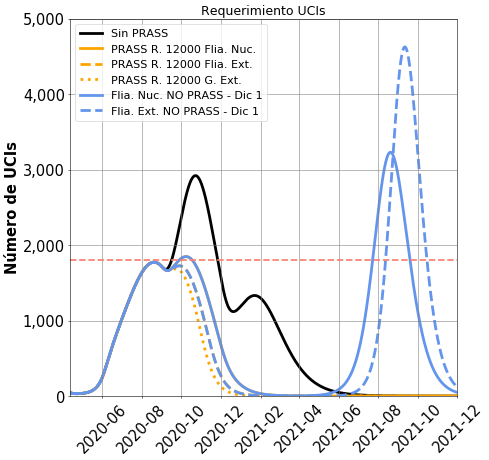

In [36]:
plot_varios([E0_NOPRASS.t_,E5_PRASS.t_,E6_PRASS.t_,E7_PRASS.t_,E8_PRASS.t_,E9_PRASS.t_],
           [E0_NOPRASS.Requieren_UCI,E5_PRASS.Requieren_UCI,E6_PRASS.Requieren_UCI,E7_PRASS.Requieren_UCI,E8_PRASS.Requieren_UCI,E9_PRASS.Requieren_UCI],
           u'Dias',u'Número de UCIs',
           labels=['Sin PRASS','PRASS R. 12000 Flia. Nuc.','PRASS R. 12000 Flia. Ext.','PRASS R. 12000 G. Ext.', u'Flia. Nuc. NO PRASS - Dic 1', u'Flia. Ext. NO PRASS - Dic 1'],
           nombre='Requerimiento UCIs',
           style=['-','-','--',':','-','--'],colors=['black','orange' ,'orange','orange','cornflowerblue','cornflowerblue'],
           hline=True, hvalues=[1800],
           x_min='12/04/2020',x_max='01/12/2021')

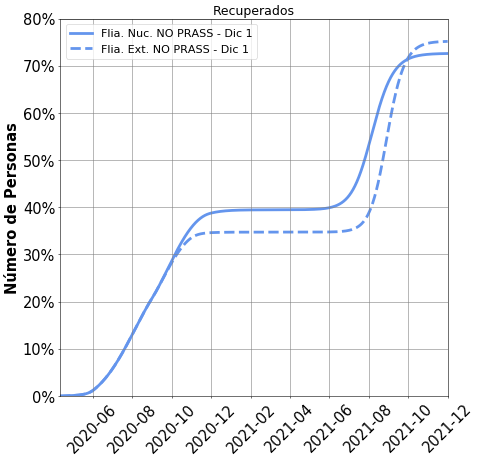

In [37]:
N0= 7592871.0
plot_varios([E8_PRASS.t_,E9_PRASS.t_],
            [np.array(E8_PRASS.R_vect)/N0,np.array(E9_PRASS.R_vect)/N0],
            eje_x=u'Dias',eje_y=u'Número de Personas',
            labels=[u'Flia. Nuc. NO PRASS - Dic 1', u'Flia. Ext. NO PRASS - Dic 1'],
            nombre='Recuperados',
            style=['-','--',':'],colors=['cornflowerblue','cornflowerblue','cornflowerblue'],
            decimales=True, porcentaje=True,
            x_min='12/04/2020',x_max='01/12/2021')